In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm, trange
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score
from matplotlib.pyplot import figure
from decimal import *

In [5]:
def concatenate_Frames(frames, timeframe):
    df = pd.DataFrame()
    for frame_name in frames:
        frame = pd.read_csv(frame_name)
        frame = pd.DataFrame(frame["close"])
        frame = frame[-timeframe:]
        frame.reset_index(inplace=True)
        frame = frame["close"]
        df[f"{frame_name[:-4]}"] = frame
    return df

In [49]:
frame = concatenate_Frames(["AAPL.csv", "GCI.csv"], 1000)
frame

,AAPL,GCI
0,77.4075,5.94
1,77.5825,5.81
2,79.2400,6.06
3,78.1700,6.17
4,77.8350,6.82
...,...,...
995,194.6800,2.62
996,193.6000,2.59
997,193.0500,2.48
998,193.1500,2.46


In [146]:
baseline_frame = yf.download(tickers=["SPY"])
baseline_frame = baseline_frame[-500:]
baseline_frame = pd.DataFrame(baseline_frame["Close"])
baseline_frame


[*********************100%%**********************]  1 of 1 completed


,Close
Date,
2022-01-10,465.510010
2022-01-11,469.750000
2022-01-12,471.019989
2022-01-13,464.529999
2022-01-14,464.720001
...,...
2023-12-29,475.309998
2024-01-02,472.649994
2024-01-03,468.790009


In [ ]:
if ((close_data.iloc[day-200:day, stock_number].max() > close_data.iloc[day, stock_number] and (portfolio_Balance < (max_amount-close_data.iloc[day, stock_number])))):
                plt.axvline(close_data.index[day], color='blue',linestyle='dashed') 
                portfolio_trades[stock_number].append(close_data.iloc[day, stock_number])
                #print(f"added balance: {portfolio_Balance } + {close_data.iloc[day, stock_number]}")
                portfolio_Balance = portfolio_Balance + close_data.iloc[day, stock_number]
                portfolio_Balance_OT.append(portfolio_Balance)    
                portfolio_Balance_OT.append(portfolio_Balance)
                positions_list[stock_number] = positions_list[stock_number] + pos_size
                num_of_buys = num_of_buys +1
                print(f"bought {Tickers[stock_number]} at {close_data.iloc[day, stock_number]}, Balance: {portfolio_Balance}")
                  
            elif (close_data.iloc[day-200:day, stock_number].min() < close_data.iloc[day, stock_number] and positions_list[stock_number] >= pos_size):
                plt.axvline(close_data.index[day], color='red',linestyle='dashed')
                positions_list[stock_number] = positions_list[stock_number] - pos_size
                bought_at = portfolio_trades[stock_number].pop(0)
                profit_and_loss = profit_and_loss + (close_data.iloc[day, stock_number] - bought_at)
                portfolio_Balance = portfolio_Balance - close_data.iloc[day, stock_number]
                print(f"Sold {Tickers[stock_number]} at {close_data.iloc[day, stock_number]} and was bought at {bought_at} with profit: {close_data.iloc[day, stock_number]-bought_at}, balance: {portfolio_Balance}")
                profit_and_loss_graph.append(profit_and_loss)

In [323]:
df = yf.download(tickers=["SPY", "AMZN", "GCI", "V", "RTX", "ADBE", "AVGO", "ULTA"], start="2023-01-10")["Close"]
diffirenced_df = df[:10].pct_change().dropna()
#corr = diffirenced_df.corr()
Tickers = diffirenced_df.columns.values.tolist()
corr

[*********************100%%**********************]  8 of 8 completed


,ADBE,AMZN,AVGO,GCI,RTX,SPY,ULTA,V
ADBE,1.000000,0.531192,0.609773,0.543602,0.169140,0.834360,0.266794,0.746254
AMZN,0.531192,1.000000,0.363142,0.235769,-0.123908,0.710632,0.299315,0.408714
AVGO,0.609773,0.363142,1.000000,0.894092,0.708635,0.773628,0.717465,0.393756
GCI,0.543602,0.235769,0.894092,1.000000,0.652746,0.755338,0.526813,0.448587
RTX,0.169140,-0.123908,0.708635,0.652746,1.000000,0.423306,0.252262,0.320719
SPY,0.834360,0.710632,0.773628,0.755338,0.423306,1.000000,0.347657,0.757404
ULTA,0.266794,0.299315,0.717465,0.526813,0.252262,0.347657,1.000000,-0.222214
V,0.746254,0.408714,0.393756,0.448587,0.320719,0.757404,-0.222214,1.000000


In [302]:
buy_list = []
for stock_number in range(len(Tickers)):
    
    for stock_number2 in range(len(Tickers)):
        if stock_number2 == stock_number:
            continue
        if corr.iloc[stock_number2,stock_number] < 0.5:
            if ([stock_number, stock_number2]) in buy_list:
                continue
            print(f"buy {Tickers[stock_number2]} and {Tickers[stock_number]}")
            buy_list.append([stock_number2,stock_number])
        #print(corr.iloc[row,column])  
buy_list     

buy GCI and AMZN
buy V and AMZN
buy V and GCI


[[1, 0], [3, 0], [3, 1]]

In [29]:
num = [[4,4],[5,5],[6,6]]

    
num[0][1]

4

In [78]:
def BackTest(df, max_amount): 
    df = pd.DataFrame(df)  
    Tickers = df.columns.values.tolist()
    close_data = df
    diffirenced_df = df.pct_change()
    #baseline
    days_amount = df.shape[0]
    baseline_frame = yf.download(tickers=["SPY"])
    baseline_frame = baseline_frame[-days_amount:]
    baseline_frame = pd.DataFrame(baseline_frame["Close"])
    baseline_PnL_OT = []
    for day in range(0,len(baseline_frame.index)):
        baseline_PnL_OT.append(((baseline_frame.iloc[day,0]-baseline_frame.iloc[0,0])/baseline_frame.iloc[0,0])*100)
    baseline_PnL_OT_frame = pd.DataFrame(baseline_PnL_OT)
    
    pos_size = 50
    figure(figsize=(20, 15), dpi=80)
    close_data.plot()
    close_data.plot()
    plt.title("Buys and Sells")
    portfolio_trades = [[],[],[],[],[],[],[],[]]
    portfolio_Balance = 0.0
    portfolio_Balance_OT = []
    trades = []
    profit_and_loss = 0
    profit_and_loss_graph = []
    unrealised_pnl = 0.0 
    buys = 0
    sells = 0
    position_size = 50
        
    for day in range(110, len(close_data.index),7):
        diffirenced_df = df[day-10:day].pct_change().dropna()
        corr_matrix = diffirenced_df.corr()
        for stock_number in range(len(Tickers)):
            buy_list = []
            sell_list = []
            for stock_number2 in range(len(Tickers)):
                if stock_number2 == stock_number:
                    continue
            if corr_matrix.iloc[stock_number2,stock_number] < -0.7:
                if ([stock_number, stock_number2]) in buy_list:
                    continue  
                    
                plt.axvline(close_data.index[day], color='blue',linestyle='dashed') 
                trades.append([stock_number,position_size, (position_size/close_data.iloc[day, stock_number]), close_data.iloc[day, stock_number], True])
                portfolio_Balance = portfolio_Balance + position_size
                portfolio_Balance_OT.append(portfolio_Balance)    
                buys = buys +1
                print(f"bought {position_size} of {Tickers[stock_number]} with pair: {Tickers[stock_number2]} with corr: {corr_matrix.iloc[stock_number2,stock_number] } at {close_data.iloc[day, stock_number]}, Balance: {portfolio_Balance}")
                
                trades.append([stock_number2,position_size, (position_size/close_data.iloc[day, stock_number2]), close_data.iloc[day, stock_number2], True])
                portfolio_Balance = portfolio_Balance + position_size
                portfolio_Balance_OT.append(portfolio_Balance)
                buys = buys + 1
                print(f"bought {position_size} of {Tickers[stock_number2]} with pair: {Tickers[stock_number]} with corr: {corr_matrix.iloc[stock_number2,stock_number] } at {close_data.iloc[day, stock_number2]}, Balance: {portfolio_Balance}")
                
                  
            elif corr_matrix.iloc[stock_number2,stock_number] > 0.8 and len(trades) > 0:            
                if ([stock_number, stock_number2]) in sell_list:
                    continue         
                plt.axvline(close_data.index[day], color='red',linestyle='dashed')
                
                for trade in trades:
                    if stock_number == trade[0] and trade[4] == True:                  
                        profit_and_loss = profit_and_loss + (trade[2]*(close_data.iloc[day, stock_number] - trade[1]))
                        portfolio_Balance = portfolio_Balance - position_size
                        profit_and_loss_graph.append(profit_and_loss)
                        trade[4] == False
                        sells = sells + 1
                        print(f"Sold {Tickers[stock_number]} at {close_data.iloc[day, stock_number]} and was bought at {trade[1]} with profit: {trade[2]*(close_data.iloc[day, stock_number] - trade[1])}, balance: {portfolio_Balance}")
                        continue
                print("cant sell")
                continue
                
                
                
                          
    for trade in trades:
        trade[0] = stock_number
        unrealised_pnl = unrealised_pnl + (trade[1]*(close_data.iloc[-1, trade[0]] - trade[3] ))
         
    profit_and_loss_graph_Frame = pd.DataFrame(profit_and_loss_graph)
    pnl_percentage = []
    for day in range(0,len(profit_and_loss_graph_Frame.index)):
        pnl_percentage.append(((profit_and_loss_graph_Frame.iloc[day,0])/max_amount)*100) 
    if len(pnl_percentage) >0:
        pnl_percentage[-1] = pnl_percentage[-1] + (unrealised_pnl/max_amount)*100
        pnl_percentage_frame = pd.DataFrame(pnl_percentage)
      
    portfolio_Balance_OT_Frame = pd.DataFrame(portfolio_Balance_OT)
    portfolio_Balance_OT_Frame.plot()
    plt.title("Portfolio Balance")
    
    pnl_percentage_frame.plot()
    plt.title("Profit and Loss")
    #plt.plot(baseline_PnL_OT_frame)
    baseline_PnL_OT_frame.plot()
    plt.title("S&P")
    #print(f"Position:  {positions_list_shares}")
    print(f"Realised P&L:  {profit_and_loss}")
    print(f"Unrealised P&L:  {unrealised_pnl}")
    print(f"P&L:  {unrealised_pnl + profit_and_loss}")
    print(f"ROI:  {((unrealised_pnl + profit_and_loss)/portfolio_Balance_OT_Frame.max())*100}%")
    print(f"ROI Of Baseline:  {baseline_PnL_OT_frame.iloc[-1,0]}%")
    print(f"buys = {buys} and sells = {sells}")

In [3]:
df = yf.download(tickers=["SPY", "AMZN", "GCI", "V", "RTX", "ADBE", "AVGO", "ULTA"], start="2012-01-10")["Close"]
df = df.dropna()
df

[*********************100%%**********************]  8 of 8 completed


,ADBE,AMZN,AVGO,GCI,RTX,SPY,ULTA,V
Date,,,,,,,,
2014-02-04,59.720001,17.397499,54.009998,10.50,68.659531,175.389999,83.500000,53.634998
2014-02-05,61.000000,17.322500,53.980000,12.29,67.910637,175.169998,85.820000,53.902500
2014-02-06,61.340000,17.729500,55.200001,13.89,68.879799,177.479996,88.339996,54.752499
2014-02-07,62.880001,18.054001,56.570000,14.00,69.685333,179.679993,88.309998,55.445000
2014-02-10,63.779999,18.043501,56.310001,14.17,70.232849,180.009995,87.720001,55.137501
...,...,...,...,...,...,...,...,...
2024-01-18,593.700012,153.500000,1143.910034,2.27,85.470001,476.489990,475.500000,268.140015
2024-01-19,611.549988,155.339996,1211.199951,2.27,85.529999,482.429993,472.570007,270.899994
2024-01-22,603.590027,154.779999,1220.500000,2.38,85.019997,483.450012,476.899994,271.200012


[*********************100%%**********************]  8 of 8 completed
[*********************100%%**********************]  1 of 1 completed
bought 50 of AMZN with pair: V with corr: -0.8087262183926381 at 41.37300109863281, Balance: 50.0
bought 50 of V with pair: AMZN with corr: -0.8087262183926381 at 85.9000015258789, Balance: 100.0
Sold V at 85.9000015258789 and was bought at 50 with profit: 20.89639166948291, balance: 50.0
cant sell
cant sell
Sold V at 87.80000305175781 and was bought at 50 with profit: 22.002329674214202, balance: 0.0
cant sell
cant sell
Sold V at 88.79000091552734 and was bought at 50 with profit: 22.57857987571814, balance: -50.0
cant sell
cant sell
cant sell
cant sell
Sold V at 89.55000305175781 and was bought at 50 with profit: 23.0209559657823, balance: -100.0
cant sell
Sold V at 88.86000061035156 and was bought at 50 with profit: 22.61932474974654, balance: -150.0
cant sell
cant sell
cant sell
Sold V at 89.36000061035156 and was bought at 50 with profit: 22.910

<Figure size 1600x1200 with 0 Axes>

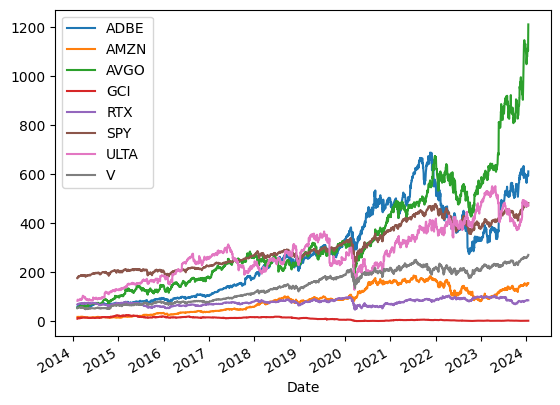

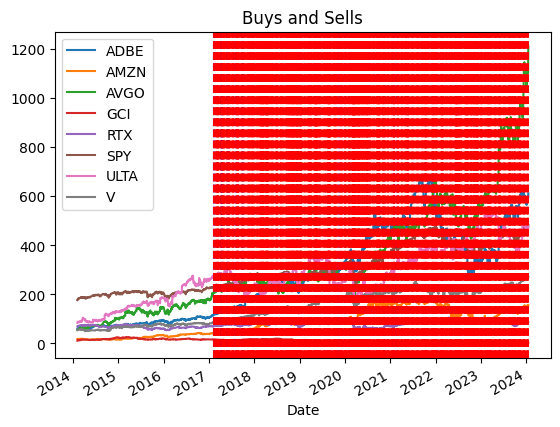

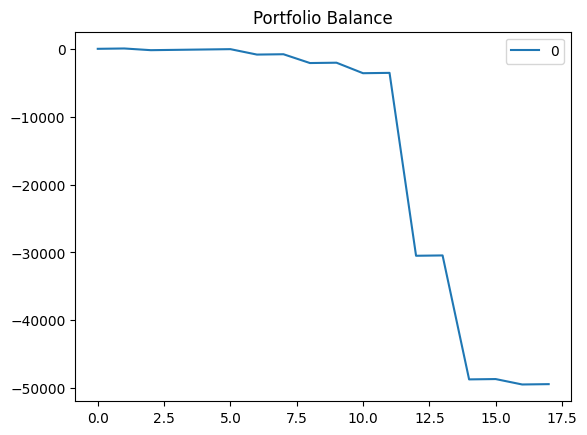

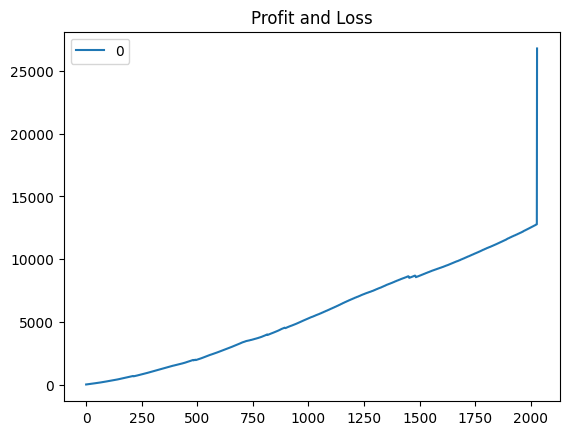

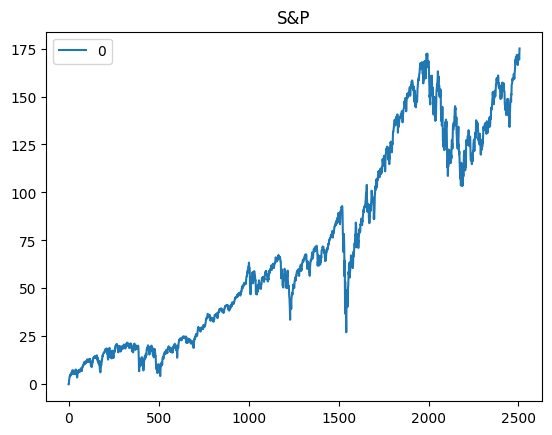

In [79]:
df = yf.download(tickers=["SPY", "AMZN", "GCI", "V", "RTX", "ADBE", "AVGO", "ULTA"], start="2012-01-10")["Close"]
df = df.dropna()
BackTest(df, 1000)